# Prosta Regresja Liniowa

W założeniu modelu liniowego podlegającego superwizji definiujemy dane wejściowe (input) i cele (target), zaś
wagi (weights), obciążenia (bias) i dane wyjściowe (output) pozwalamy wyciągnąć samej maszynie.

### 1. Import bibiliotek

In [6]:
import numpy as np
#Poniższe przyda się do wizualizacji w tym wypadku - TensorFlow ma swój TensorBoard do wizualizacji.
import matplotlib.pyplot as plt   # generator grafów - imho coś jak bokeh.
from mpl_toolkits.mplot3d import Axes3D # wizualizacja ww. w 3D.

### 2. Generowanie losowych danych do podstawienia do modelu.

In [5]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size =(observations,1)) # funkcja generowania liczb losowych w numpy.
# Od -10 do 10 z równą szansą dla każdej. rozmiar to liczba obserwacji / liczba zmiennych (tutaj 1 zmienna)
zs = np.random.uniform(-10,10,(observations,1)) # ta sama funkcja, druga kolumna i bez opisu wewnątrz.

inputs = np.column_stack((xs,zs)) # Ta funkcja łączy dwie kolumny ze sobą - w ten sposób będzie wyglądać input w TF.
# W tym wypadku mamy do czynienia z matrycą 1000x2.

print(inputs.shape) # Drukuje kształt matrycy. Tutaj użyte jako sanity check.

(1000, 2)


### 3. Utworzenie celów do których ma dążyć maszyna

In [11]:
noise = np.random.uniform(-1,1,(observations,1)) # Generuje 'szum' w danych docelowych. 
# Kiedy zapewniamy maszynie próbkę danych to one nigdy nie są idealne i to reprezentuje ten niewielki szum.

targets = 2*xs - 3*xs + 5 + noise # Tę funkcję ma 'odkryć' maszyna ucząc się z naszych danych. 
# W ten sposób mówimy, że wagi mają mieć 2 i -3 a błąd 5. Jest to wektor 1000x1.

print(targets.shape) # Kolejny sanity check, żeby sprawdzić, czy dobrze zdefiniowaliśmy cele.

(1000, 1)


### 4. Tworzenie grafu 3D dla podglądu danych treningowych

Chodzi tu o to, żeby zobaczyć na wykresie czy występuje tu trend jaki chcieliśmy uzyskać.

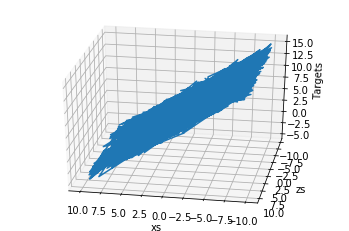

In [13]:
# Używamy .reshape żeby przygotować cele pod graf.
# reshape jest w docsach do numpyego. Jako argumenty przyjmuje wymiary, którymi chcemy opisać obiekt.
targets = targets.reshape(observations,)

# Używanie matplotlib - typowa składnia.

# Zadeklarowanie grafu
fig = plt.figure()

# Metoda tworząca graf 3d
ax = fig.add_subplot(111, projection='3d')

# Dobór osi
ax.plot(xs, zs, targets)

# Dobór nazw osi.
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# Azymut pozwala oglądać dane z różnych stron. Można się tym pobawić. Np. azim = 0 lub 200.
ax.view_init(azim=100)

# Pokaż graf.
plt.show()

# Przywracamy poprzedni kształt celom, żeby można ich ponownie użyć do nauki.
# Równie dobrze można było je przepisać na nową zmienną np. 'targets_plot' i teraz tego nie robić
# ale warto znać i metodę odwrotną tak na wszelki wypadek. Pytanie co jest mniej zasobochłonne.
targets = targets.reshape(observations,1)

### 5. Inicjalizowanie zmiennych

In [21]:
# Zmienna do podstawienia do funkcji generującej losowo startowe wagi i błędy. Na starcie będzie +/- tyle.
# Można się z tym pobawić, ale jak ustawisz za dużo, to algorytm się zawiesi. Lepiej nie ruszać w ogóle.
init_range = 0.1

# Wagi mają wymiar k x m, gdzie k to ilość zmiennych wejściowych (tutaj 2 - x,z), a m to ilość zmiennych wyjściowych
# (tutaj 1 - y). Logicznie matryca wag ma u nas wymiar 2x1.
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Mamy jedno obciążenie, gdyż jest tylko jeden output. Obciążenie to skalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Sanity check. Zwraca wagi i obciążenia, żeby mieć ogląd na sposób ich inicjalizacji.
wagi = "wagi: %s" % weights
obci = "obciążenia: %s" % biases
print (wagi)
print (obci)

wagi: [[-0.08330088]
 [ 0.00554519]]
obciążenia: [-0.00963144]


### 6. Ustalanie prędkości uczenia się modelu

Ogólnie przy MNIST od Hindusa używałem 0.01 i strasznie muliło, ale w 30 krokach robiło robotę.
Warto się z tym pobawić. Zwłaszcza przy prostszych modelach, albo mocniejszych maszynach.
Ostatecznie zawsze można przerwać operacje i zmienić wartość na większą a mniej dokładną.

In [22]:
learning_rate = 0.02 # Amerykanie polecają tyle do tego modelu, ale się przy tym nie upierają.